# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# My Cell

mouse_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# Renaming comuns for ease of coding

mouse_df = mouse_df.rename(columns={'Mouse ID': 'ID', 'Drug Regimen': 'Drug', 'Weight (g)': 'Wt',
                           'Timepoint': 'time', 'Tumor Volume (mm3)': 'tvolume', 'Metastatic Sites': 'sites'})
mouse_df.columns


Index(['ID', 'Drug', 'Sex', 'Age_months', 'Wt', 'time', 'tvolume', 'sites'], dtype='object')

In [5]:
# My cell
mouse_df.describe()


,Age_months,Wt,time,tvolume,sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [6]:
# My Cell
mouse_df['Drug'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [7]:
# Checking the number of mice.
mouse_df['ID'].nunique()


249

In [8]:
# My Cell
mouse_df['time']

0        0
1        5
2       10
3       15
4       20
        ..
1888    25
1889    30
1890    35
1891    40
1892    45
Name: time, Length: 1893, dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_df[mouse_df.duplicated(subset=['ID', 'time'])]
duplicates['ID'].unique()


array(['g989'], dtype=object)

In [10]:
#My cell

all_duplicates = pd.DataFrame(duplicates)
# all_duplicates.
mouse_df.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID.


In [12]:
mouse_df_clean = mouse_df.drop_duplicates(subset=['ID', 'time'])
mouse_df_clean.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean = mouse_df.drop_duplicates(subset=['ID', 'time'], keep=False)
mouse_df_clean.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice in the clean DataFrame.
mouse_df_clean.to_csv('mouse_clean.csv')
mouse_df_clean['ID'].nunique()

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_mean = mouse_df_clean.groupby('Drug').mean()['tvolume']
reg_med = mouse_df_clean.groupby('Drug').median()['tvolume']
reg_var = mouse_df_clean.groupby('Drug').var()['tvolume']
reg_std = mouse_df_clean.groupby('Drug').std()['tvolume']
reg_sem = mouse_df_clean.groupby('Drug').sem()['tvolume']
reg_med.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Tumor Volume Mean':reg_mean,
                              'Tumor Volume Median':reg_med,
                              'Tumor Volume Variance':reg_var,
                              'Tumor Volume Std. Dev.': reg_std,
                              'Tumor Volume Std. Err.': reg_sem
})
summary_stats


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"])
mouse_df_clean_csv = pd.DataFrame(mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"]))
# mouse_df_clean_csv.to_csv('mouse_clean.txt')

## Bar and Pie Charts

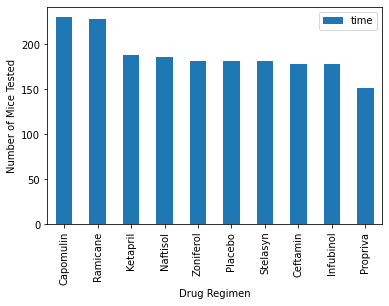

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_num = mouse_df_clean.groupby(['Drug'])
# timepoint_num.head()
stat_labels = pd.DataFrame(timepoint_num['time'].count())
stat_labels.reset_index()
stat_labels_sort = stat_labels.sort_values(by='time', ascending=False)
stat_labels_sort
# drug_labels['Drug'] = timepoint_num[['Drug']]
# drug_labels.head(20)
stat_labels.to_csv('labels_check.csv')
drug_list = list(stat_labels_sort.index.values)
stat_labels_sort.plot(kind='bar', figsize=(6,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

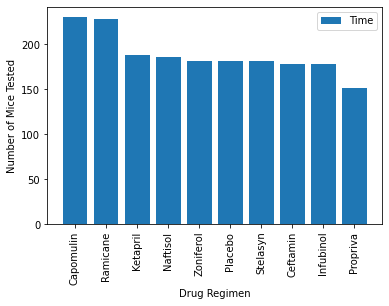

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x=stat_labels_sort.index, height=stat_labels_sort['time'], 
                                                align='center')
plt.xticks(rotation=90)
plt.legend(['Time'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show

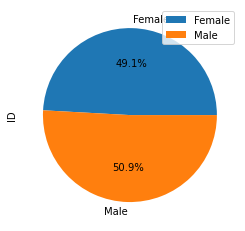

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = mouse_df_clean.groupby(['Sex'])['ID']
gender.nunique()
gender = pd.DataFrame(round(gender.count(),2))
gender.plot(kind='pie', subplots=True, autopct="%1.1f%%")
plt.show()



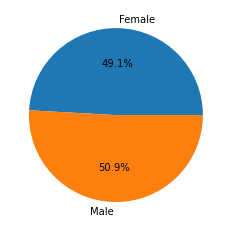

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index
sizes = gender['ID']
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# mouse_group = mouse_df_clean.groupby(mouse_df_clean['ID'])
timepoint_lg = mouse_df_clean.nlargest(mouse_df_clean['ID'].nunique(),['time'])
timepoint_lg

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1464,r604,Naftisol,Male,7,30,40,60.186115,2
1474,r701,Naftisol,Male,21,25,40,66.640722,1
1517,s337,Zoniferol,Male,14,27,40,56.994816,4
1527,s565,Stelasyn,Female,3,29,40,67.221007,2


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset

# Determine outliers using upper and lower bounds


In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
